<a href="https://colab.research.google.com/github/KhoaKD59/HomeworkW10_2023/blob/main/FashionMinist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential

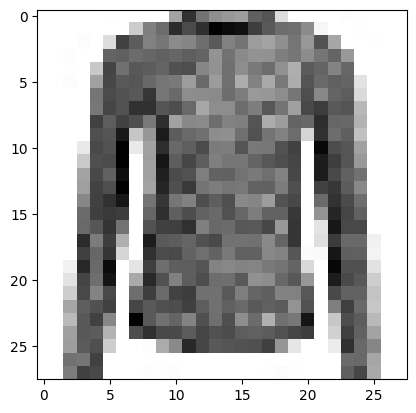

Number: 6


In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
hinh = train_images[2222]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print('Number:',train_labels[2222])

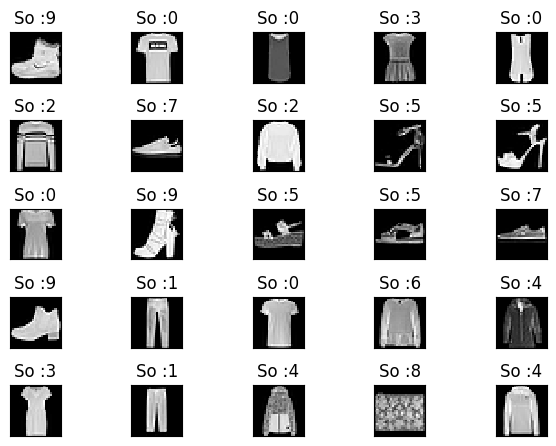

In [5]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape= (28*28,))) #Gia tri toi uu
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [9]:
from keras.utils import to_categorical #one hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [15]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1984 - accuracy: 0.9259
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1891 - accuracy: 0.9294
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1835 - accuracy: 0.9314
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1808 - accuracy: 0.9326
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1748 - accuracy: 0.9359
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1711 - accuracy: 0.9359
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1659 - accuracy: 0.9384
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1614 - accuracy: 0.9406
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1574 - accuracy: 0.9419
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1525 - accura

In [16]:
model.save('model1.h5')

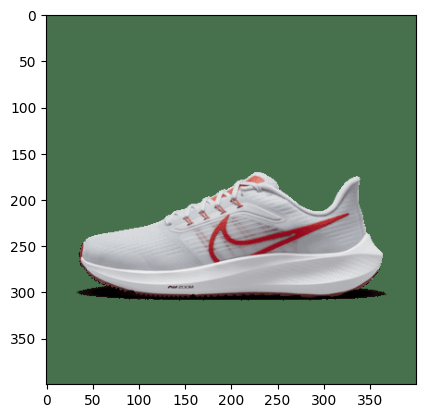

In [17]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

url = 'nike.png'
img = load_img(url)
imshow(img)

In [18]:
img = load_img(url, target_size = (28,28))
img = img_to_array(img)
img2 = np.zeros((28, 28))
for x in range(28):
  for y in range(28):
     img2[x][y] = img[x][y][1]
img2 = img2.reshape(1,28*28)
img2 = img2.astype('float32')
img2 = img2/255
np.argmax(model.predict(img2), axis = -1)

1/1 [==============================] - 0s 81ms/step


array([8])